<a href="https://colab.research.google.com/github/FarrazNouval/Python-for-production-and-operation-management/blob/main/assignment_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

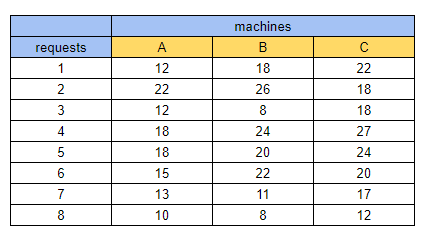

The image above is a table that shows how long each machine takes to complete each request. And the problem is figuring out how to assign each request to machines so that we can complete them all effectively and efficiently.

In [1]:
import numpy as np
import pandas as pd

In [2]:
arr = [
    [12, 18, 22],
    [22, 26, 18],
    [12, 8, 18],
    [18, 24, 27],
    [18, 20, 24],
    [15, 22, 20],
    [13, 11, 17],
    [10, 8, 12]
    ]

x = np.array(arr)


Let's try to solve it by hand.
1. Determine the maximum and actual work times (start from zero).
2. Examine each request (row) to find which machine can do it the fastest.
3. Add up the actual and minimal work hours in that row.
4. Save the sum if it is less than or equal to the maximum work time.
5. If the sum is greater than the maximum work time, check the second faster, and so on.



In [10]:
# declare the maximum work time
max_time = 40 

# declare the actual work time
times = {'1':0.0,
         '2':0.0,
         '3':0.0}

# declare the variable to save the request and machine combination 
machines = {'1':[],
            '2':[],
            '3':[]}

for i in range(len(x)):

  while True:
    row_elements = x[i] # capture times to finish the request
    min_idx = np.argmin(row_elements) # capture the index of the minimum time (capture the machine)

    # check if the sum is lower than or equal to max work time
    if row_elements[min_idx] + times[str(min_idx + 1)] <= max_time:
      # if true sum up actual work time and work time
      times[str(min_idx + 1)] += row_elements[min_idx]
      # append the request number to the machine
      machines[str(min_idx + 1)].append(i + 1)
      break

    else:
      # if the sum is higher than max work time
      row_elements[min_idx] = 999 # change the work time to 999 so we can find the next faster time
      

In [11]:
times


{'1': 40.0, '2': 39.0, '3': 38.0}

In [12]:
machines

{'1': [1, 4, 8], '2': [3, 5, 7], '3': [2, 6]}

Now let's solve it using the OOP approach.

In [6]:
class AssignmentMethod2:
  def __init__(self, arr, max_time):
    self.arr = arr
    self.arr_cp = arr.copy()
    self.max_time = max_time
    self.times = {str(i + 1):0 for i in range(arr.shape[1])}
    self.times_arr = {str(i + 1):[] for i in range(arr.shape[1])}
    self.machines = {str(i + 1):[] for i in range(arr.shape[1])}
  
  def process(self):
    for i in range(len(self.arr_cp)):

      while True:

        row_elements = self.arr_cp[i]
        min_idx = np.argmin(row_elements)

        if row_elements[min_idx] + self.times[str(min_idx + 1)] <= self.max_time:
          self.times[str(min_idx + 1)] += row_elements[min_idx]
          self.times_arr[str(min_idx + 1)].append(row_elements[min_idx])
          self.machines[str(min_idx + 1)].append(i + 1)
          break
        
        else:
          row_elements[min_idx] = 9999
  
  def show_times_table(self):
    max_element_length = 0

    # capture the max length of columns
    for i in self.times_arr.keys():
      if len(self.times_arr[i]) > max_element_length:
        max_element_length = len(self.times_arr[i])
    
    # if the column length is lower than the max length
    # then fill it with 0 till the length is equal to max element length variable
    for i in self.times_arr.keys():
      if len(self.times_arr[i]) < max_element_length:
        selisih = max_element_length - len(self.times_arr[i])
        for j in range(selisih, max_element_length - 1):
          self.times_arr[i].append(0)

    # visualize the table using pandas
    times_table = pd.DataFrame(self.times_arr)
    times_table.index = [''] * len(times_table)
    total_times = pd.DataFrame(self.times, index=['Total'])
    times_table = pd.concat([times_table, total_times], axis=0)
    times_table.columns = times_table.columns.map(lambda x: 'machine ' + x)
    return times_table
  
  def show_machines_table(self):
    max_element_length = 0

    for i in self.machines.keys():
      if len(self.machines[i]) > max_element_length:
        max_element_length = len(self.machines[i])
    
    for i in self.machines.keys():
      if len(self.machines[i]) < max_element_length:
        selisih = max_element_length - len(self.machines[i])
        for j in range(selisih, max_element_length - 1):
          self.machines[i].append(0)
    
    machine_table = pd.DataFrame(self.machines)
    machine_table.columns = machine_table.columns.map(lambda x: 'machine ' + x)
    machine_table.index = [''] * len(machine_table)
    return machine_table



In [7]:
testing = AssignmentMethod2(x, 40)
testing.process()


In [8]:
testing.show_times_table()

,machine 1,machine 2,machine 3
,12,8,18
,18,20,20
,10,11,0
Total,40,39,38


In [9]:
testing.show_machines_table()


,machine 1,machine 2,machine 3
,1,3,2
,4,5,6
,8,7,0


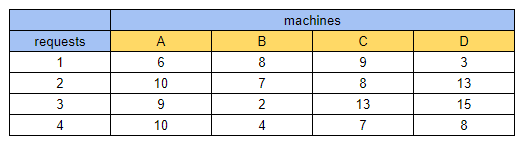

The image above is a table that shows how much each machine costs to complete each request. And the problem is figuring out how to assign each request to machines so that we can complete them all effectively and efficiently.

conditions that must be met:
1. The number of machines must be equal to the number of requests.
2. One machine can only finish one request.

There is a scipy method to solve it (linear_sum_assignment)



In [13]:
from scipy.optimize import linear_sum_assignment

arr_2 = np.array([[6, 8, 9, 3],
                  [10, 7, 8, 13],
                  [9, 2, 13, 15],
                  [10, 4, 7, 8]])


In [14]:
row_idx, col_idx = linear_sum_assignment(arr_2)


In [16]:
for i, j in zip(row_idx, col_idx):
  print(f"request number {i + 1} must be done by machine in column number {j + 1}")


request number 1 must be done by machine in column number 4
request number 2 must be done by machine in column number 1
request number 3 must be done by machine in column number 2
request number 4 must be done by machine in column number 3


In [18]:
total_cost = arr_2[row_idx, col_idx].sum()
print(f"Total cost is ${total_cost}")


Total cost is $22
